In [3]:
import torch
import torch.nn as nn
from fastai.vision.all import *
from fastai.metrics import *
from fastai.vision.data import *
from pathlib import Path
from fastai.callback import *
import fastai

C:\Users\bedir\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Belirtilen yordam bulunamadı
  warn(f"Failed to load image Python extension: {e}")


In [4]:
print(torch.__version__)

1.13.1


In [5]:
print(fastai.__version__)

2.7.11


In [6]:
 path=Path(r"C:\Users\bedir\OneDrive\Masaüstü\f11_data\fastai")

In [7]:
data=ImageDataLoaders.from_folder(path,train="train",valid="valid",test="test",bs=8,item_tfms=Resize(28),shuffle=True)

In [8]:
data

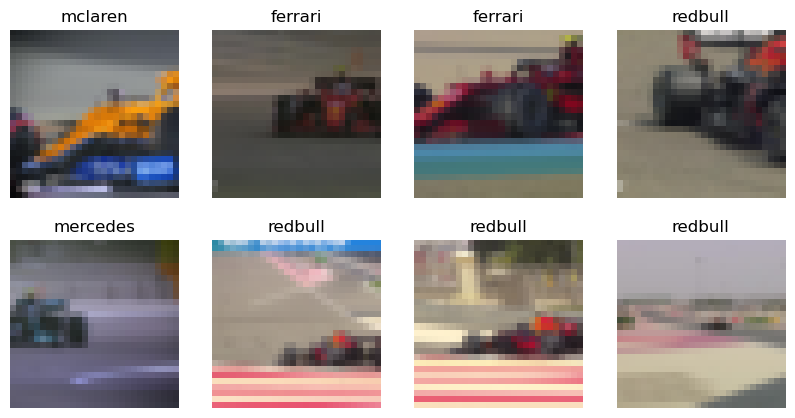

In [9]:
data.show_batch(figsize=(10,5))

In [10]:
model=nn.Sequential(
    nn.Conv2d(3,4,kernel_size=(2,2)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Conv2d(4,8,kernel_size=(2,2)),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(1152,30),
    nn.Linear(30,4)
)

In [11]:
model

Sequential(
  (0): Conv2d(3, 4, kernel_size=(2, 2), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(4, 8, kernel_size=(2, 2), stride=(1, 1))
  (4): ReLU()
  (5): Flatten(start_dim=1, end_dim=-1)
  (6): Linear(in_features=1152, out_features=30, bias=True)
  (7): Linear(in_features=30, out_features=4, bias=True)
)

In [12]:
learn=Learner(data,model,loss_func=fastai.losses.CrossEntropyLossFlat(),metrics=[accuracy,error_rate])

In [13]:
learn.summary()

Sequential (Input shape: 8 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 4 x 27 x 27     
Conv2d                                    52         True      
ReLU                                                           
____________________________________________________________________________
                     8 x 4 x 13 x 13     
MaxPool2d                                                      
____________________________________________________________________________
                     8 x 8 x 12 x 12     
Conv2d                                    136        True      
ReLU                                                           
____________________________________________________________________________
                     8 x 1152            
Flatten                                                        
____________________________________________________________________________
                     8 x 30       

In [14]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.395632,1.387366,0.285714,0.714286,00:31
1,1.384987,1.364229,0.371429,0.628571,00:28
2,1.369915,1.320202,0.403571,0.596429,00:27
3,1.343476,1.272485,0.392857,0.607143,00:29
4,1.294259,1.241808,0.392857,0.607143,00:28
5,1.276789,1.197320,0.425000,0.575000,00:29
6,1.246833,1.156530,0.514286,0.485714,00:31
7,1.212698,1.133539,0.510714,0.489286,00:31
8,1.181996,1.113351,0.471429,0.528571,00:30
9,1.166980,1.096167,0.532143,0.467857,00:28


In [15]:
learn.fine_tune(5,freeze_epochs=5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.995852,0.948936,0.625000,0.375000,00:30
1,0.983344,0.942946,0.625000,0.375000,00:30
2,0.993898,0.941961,0.596429,0.403571,00:30
3,0.960566,0.795183,0.707143,0.292857,00:29
4,0.894196,0.727153,0.703571,0.296429,00:28


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.693764,0.620449,0.810714,0.189286,00:27
1,0.730443,0.617447,0.771429,0.228571,00:27
2,0.684389,0.524889,0.817857,0.182143,00:27
3,0.641768,0.536980,0.814286,0.185714,00:28
4,0.614048,0.515615,0.821429,0.178571,00:27


In [16]:
learn.validate()

(#3) [0.5156154036521912,0.8214285969734192,0.1785714328289032]

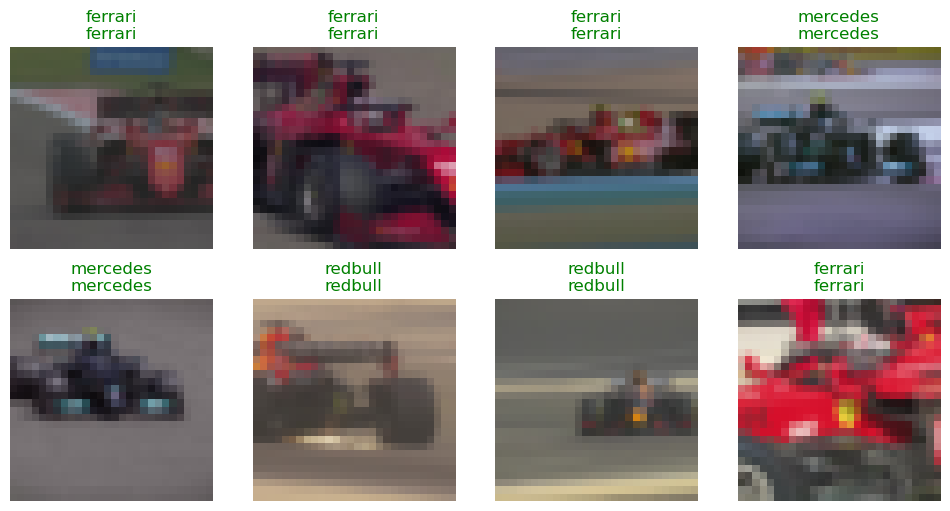

In [25]:
learn.show_results()

In [18]:
interp=ClassificationInterpretation.from_learner(learn)

In [19]:
learn.export(fname=r"C:\fastai_f11_save\udemy.pkl")

In [20]:
from fastai.vision.widgets import *
upload=widgets.FileUpload()
out=widgets.Output()
pred1=widgets.Label()

In [21]:
def data_on(change):
    pred1.value=""
    img=PILImage.create(upload.data[-1])
    out.clear_output()
    with out:
        display(img.to_thumb(224,224))
    pred,pred_idx,probs=model.predict(img)
    pred1.value=f"Tahmin:{pred} ; Olasılık: {probs[pred_idx]:.04f}"

In [26]:
import gradio as gr

In [27]:
class_names=["ferrari","mclaren","mercedes","redbull"]

In [28]:
def web_test(img):
    img=img.reshape(-1,500,500,3)
    pred=model.predict(img).flatten()
    return {class_names[i]:float(pred[i] for i in range(4))}

In [ ]:
image=gr.inputs.Image(shape=(500,500))
label=gr.outputs.Label(num_top_classes=4)

gr.Interface(fn=web_test,inputs=image,outputs=label,interpretation="default").launch(debug="True")

C:\Users\bedir\anaconda3\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\bedir\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\bedir\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\bedir\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\bedir\anaconda3\lib\site-packages\gradio\routes.py", line 394, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\bedir\anaconda3\lib\site-packages\gradio\blocks.py", line 1075, in process_api
    result = await self.call_function(
  File "C:\Users\bedir\anaconda3\lib\site-packages\gradio\blocks.py", line 884, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\bedir\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\bedir\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "C:\Users\bedir\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "C:\Users\bedir\AppData\Local\Temp\ipykernel_30508\1858140736.py